Nr 1. <br>
(a) $f(x) = (x³ + \frac{1}{3}) - (x³ - \frac{1}{3})$ <br>
Wann ist die Abweichung mehr als 1 \%?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func_f(x):
    t = (x**3 + (1/3))-(x**3 - (1/3))
    return t

def func_f_32(x):
    t = (np.float32(x**3) + np.float32((1/3)))-(np.float32(x**3) - np.float32((1/3)))
    return t

def func_g(x):
    g = ((3+((x**3)/3))-(3-((x**3)/3)))/(x**3)
    return g 

def func_g_32(x):
    g = ((np.float32(3)+(np.float32(x**3)/np.float32(3)))-(np.float32(3)-(np.float32(x**3)/np.float32(3))))/np.float32(x**3)
    return g     
    
t = func_f(1)
x=1.0

while abs((2/3) - t) < 0.01 :
    x = x + 10
    t = (x**3 + (1/3))-(x**3 - (1/3))
    
print(x,t)

41291.0 0.65625


In [2]:
#Finetuning des Wertes 
x = x - 10
t = func_f(x)

while abs((2/3) - t) < 0.01 :
    x = x + 1
    t = (x**3 + (1/3))-(x**3 - (1/3))

print("Finegetuntes x: ",x,t)

Finegetuntes x:  41286.0 0.65625


Beim Ausführen des Codes kommt ein $x = 41286$ und ein $f = 0,65625$ heraus. D.h. bei ca. $41,1 \cdot 10³$ wird die Abweichung größer als 1 \%. Aus der Vorlesung geht hervor, dass die Fehler bei $x \rightarrow \infty$ größer werden (bis 0 herauskommt). Daher ist das Intervall, indem der Fehler größer als 1% ist $[41,291;\infty]$.

In [3]:
#Berechnung des Wertes wann es 0 wird bei 32 data type
x_32 = np.float32(1.0)
t_32 = func_f(np.float32(x_32))

while abs((2/3) - t_32) < 0.01 :
    x_32 = np.float32(x_32 + 10)
    t_32 = np.float32(func_f_32(np.float32(x_32)))
    
print("Grober 1% Fehler des 32er Typen",x_32,t_32)

#Finetuning des Wertes 
x_32 = np.float32(x_32 - 10)
t_32 = func_f_32(np.float32(x_32))

while abs((2/3) - t_32) < 0.01 :
    x_32 = x_32 + 1
    t_32 = func_f_32(x_32)

print("Feiner 1% Fehler des 32er Typen: ",x_32,t_32)

Grober 1% Fehler des 32er Typen 51.0 0.65625
Feiner 1% Fehler des 32er Typen:  51.0 0.65625


Bei der 32 Datentyp Variante ergibt sich $51$ als Grenze, ab dem das Ergebnis um mehr als 1 % abweicht. Das heißt das Intervall indem dier Fehler größer ist als 1 % ist $[51;\infty]$ (Ich hatte einige Probleme damit, den Interpreter dazu zu zwingen, dass er diesen datatype verwenden soll, wie man sieht)

Jetzt wird bestimmt, wann der Wert der Funktion 0 wird. 

In [4]:
#Es wird mit dem t und x von vorher weitergerechnet, da dies effizineter ist. Man will ja sowieso in hohe x Werte reingehen. 
while t > 1e-10:
    x = x + 10
    t = (x**3 + (1/3))-(x**3 - (1/3))
    
print("Grobes x: ",x,t)

#Finetuning des Wertes 
x = x - 10
t = func_f(x)

while  t > 1e-10:
    x = x + 1
    t = (x**3 + (1/3))-(x**3 - (1/3))

print("Feines x: ",x,t)

Grobes x:  165146.0 0.0
Feines x:  165141.0 0.0


Bei etwa $165141$ gibt der Rechner Ergebnis von f schon 0 aus.

(b) Nun die Formel $g(x) = \frac{(3 + \frac{x³}{3})-(3-\frac{x³}{3})}{x³}$

In [5]:
#Berechnung des 1% Intervalls von g(x)
s = func_g(1)
x = 1.0

while abs((2/3) - s) < 0.01 :
    x = x/(1.01)
    s = func_g(x)
    
    
print("Grobes Ausrechnen: ",x,s)

x = x*1.01
s = func_g(s)

while abs((2/3) - s) < 0.01 :
    x = x/(1.0001)
    s = func_g(x)

print("Feines Ausrechnen: ",x,s)

Grobes Ausrechnen:  3.401727404650044e-05 0.6768975548113881
Feines Ausrechnen:  3.401900304629241e-05 0.676794351059524


Ab $3.401900304629241 \cdot 10^{-5}$ tritt ein Fehler von mehr als 1 \% auf. Dieser vergrößert sich nur noch, wenn $x \rightarrow 0$ (wie aus der Vorlesung bekannt). Also ist das Intervall mit einem Fehler von mehr als 1 % von $[3,4017 \cdot 10^{-5}; 0]$

In [6]:
#Berechnung der 1 % Abweichung für 32 datatype
x_g_32 = np.float32(1.0)
s_g_32 = func_g_32(x_g_32)

while abs((2/3) - s_g_32) < 0.01 :
    x_g_32 = np.float32(x_g_32/np.float32(1.01))
    s_g_32 = func_g_32(np.float32(x_g_32))
    
    
print("Grobes Ausrechnen des 32er: ",x_g_32,s_g_32)

x_g_32 = np.float32(x_g_32*np.float32(1.01))
s_g_32 = func_g_32(np.float32(x_g_32))

while abs((2/3) - s_g_32) < 0.01 :
    x_g_32 = np.float32(x_g_32/np.float32(1.0001))
    s_g_32 = func_g_32(np.float32(x_g_32))

print("Feines Ausrechnen des 32er: ",x_g_32,s_g_32)

Grobes Ausrechnen des 32er:  0.026998699 0.67842156
Feines Ausrechnen des 32er:  0.027021639 0.6766951


Der Fehler von mehr als 1 % bei einem 32er Datentypen ist im Intervall $[0,027;0]$ aufgetreten.

In [7]:
#Hier wird auch mit den oberen x und s weitergerechnet aus Effizinezgründen
while s > 1e-10:
    x = x /(1.01)
    s = func_g(x)

print("Wann es 0 wird: ",x,s)

Wann es 0 wird:  8.703488782187814e-06 0.0


Bei $8,703046431473608 \cdot 10^{-6}$ ergibt sich bereits $0$ für das Ergebnis von $g(x)$.

(c) Plots <br>
Erst f(x), dann g(x) in verschiedenen Datentypen

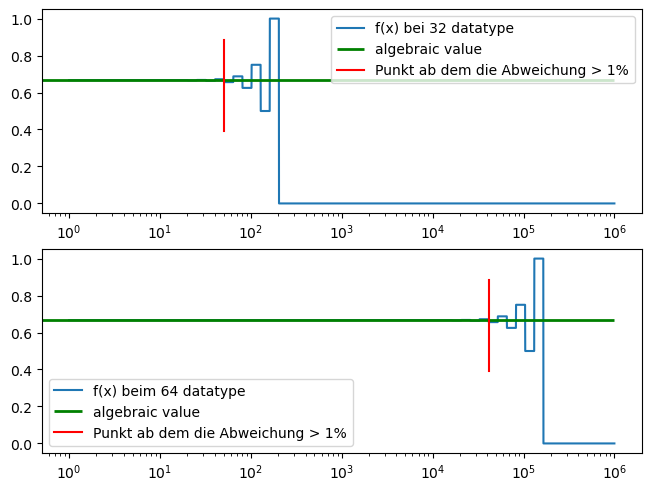

In [8]:
x_exp_32 = np.logspace(0, 6, 10000, dtype='float32')
x_exp_64 = np.logspace(0, 6, 10000, dtype='float64')


fig, (ax3, ax4) = plt.subplots(2, 1, layout="constrained")
ax3.plot(x_exp_32, func_f(x_exp_32), "-", label = "f(x) bei 32 datatype")
ax3.hlines(y = 2/3, xmin = 0, xmax = np.power(10,6), linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax3.axvline(x = 51,ymin = 0.4, ymax = 0.85, color = 'r', label = "Punkt ab dem die Abweichung > 1%")
ax3.set_xscale('log')
ax3.legend(loc="best")
ax4.plot(x_exp_64, func_f(x_exp_64), "-", label = "f(x) beim 64 datatype")
ax4.hlines(y = 2/3, xmin = 0, xmax = np.power(10,6), linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax4.axvline(x = 41286,ymin = 0.4, ymax = 0.85, color = 'r', label = "Punkt ab dem die Abweichung > 1%")
ax4.set_xscale('log')
ax4.legend(loc="best")

Die Graphen zeigen sehr gut, dass der Prozess indem die Fehler entstehen gleich ausschaut, aber bei der 32 datatype Variante wesentlich früher auftritt (Mehr als 2 Größenordnungen Unterschied)

Nun folgen die Graphen für die Funktion $g(x)$

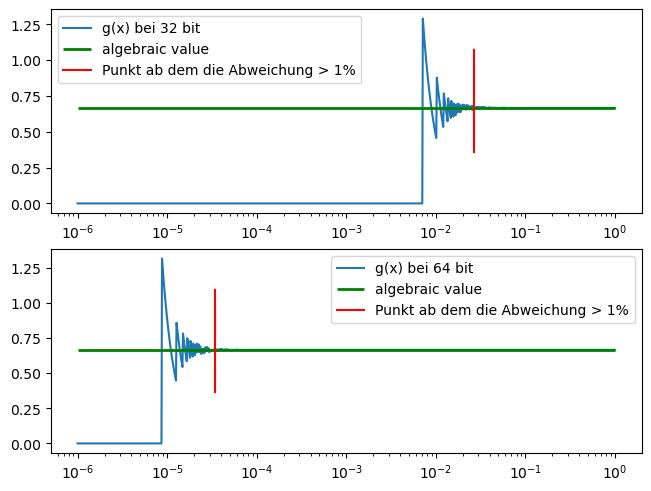

In [9]:
x_g = np.logspace(-6,0,1000)
x_g_32 = np.logspace(-6,0, 1000, dtype='float32')
x_g_64 = np.logspace(-6,0, 1000, dtype='float64')
#print(x_g)

fig, (ax6, ax7) = plt.subplots(2, 1, layout="constrained")
ax6.plot(x_g_32, func_g(x_g_32), "-", label = "g(x) bei 32 bit")
ax6.hlines(y = 2/3, xmin = 1e-06, xmax = 1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax6.axvline(x = 0.027021639,ymin = 0.3, ymax = 0.8, color = 'r', label = "Punkt ab dem die Abweichung > 1%")
ax6.legend(loc="best")
ax6.set_xscale('log')
ax7.plot(x_g_64, func_g(x_g_64), "-", label = "g(x) bei 64 bit")
ax7.hlines(y = 2/3, xmin = 1e-06, xmax = 1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax7.axvline(x = 3.401900304629241e-05,ymin = 0.3, ymax = 0.8, color = 'r', label = "Punkt ab dem die Abweichung > 1%")
ax7.legend(loc="best")
ax7.set_xscale('log')


Wie verändert sich der Graph, wenn der 32 oder 64 Datentyp verwendet wird?

Man sieht, dass der Bereich, indem die Fehler passieren, wesentlich größer ist, wenn der 32er Datentyp verwendet wird. Der Beginn des Fehlerbereiches ist bei dem 64er Datentypen mehr als 2 Größenordnungen später als beim 32er Datentypen bei der 2. Funktion. Bei der 1. Funktion ist der Unterschied noch gravierender, dort sind es ca. 3 Größenordnungen. Die Rechnung mithilfe des 64er Datentypen ist also wesentlich fehlerunanfälliger als die 32er, auch wenn irgendwann derselbe Verlauf der überschwingenden Fehler eintritt. 